In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import CheckpointCallback
from gymnasium import spaces
import torch

## Load Traffic Environment

In [2]:
# Add the `src` folder to the Python path
sys.path.append(os.path.join(os.path.abspath('..'), 'src'))
import environment_gym as env_gym

## Create Evaluation and Test Function

In [3]:
def evaluate_model(log_path):
    """
    Reads the mean reward from the evaluation log and plots it to monitor convergence.

    Args:
    - log_path (str): Path to the directory containing the log file.
    """
    # Find the monitor CSV file generated by EvalCallback
    monitor_file = os.path.join(log_path, 'evaluations.npz')

    if not os.path.isfile(monitor_file):
        print("Error: Log file not found.")
        return

    # Load evaluation results
    results = np.load(monitor_file)
    mean_rewards = results['results'].mean(axis=1)  # Mean reward per evaluation

    # Plot the mean reward to observe convergence
    plt.plot(mean_rewards)
    plt.xlabel('Evaluation Step (x1000 timesteps)')
    plt.ylabel('Mean Reward')
    plt.title('Model Convergence')
    plt.show()

In [4]:
def test_model(model_path, env, num_episodes):
    """
    Evaluates the model over a specified number of episodes, records rewards for each episode,
    and plots the rewards.

    Args:
    - model_path (str): Path to the saved model.
    - env (gym.Env): The environment to evaluate the model on.
    - num_episodes (int): Total number of episodes to run the evaluation.

    Returns:
    - episode_rewards (list): List of total rewards for each episode.
    """
    # Load the model
    model = PPO.load(model_path)

    # Initialize a list to store rewards for each episode
    episode_rewards = []

    # Run the model for the specified number of episodes
    for episode in range(num_episodes):
        obs, info = env.reset()
        episode_reward = 0  

        while True:  # Run until the episode ends
            action, _states = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, info = env.step(action)
            episode_reward += reward  # Accumulate reward

            # Check if the episode is done
            if terminated or truncated:
                episode_reward = round(episode_reward)
                episode_rewards.append(episode_reward)  # Record total reward for the episode
                break  # Exit the loop to start a new episode

    # Calculate average reward
    reward_ave = round(sum(episode_rewards) / num_episodes)
    print(f"Average reward of {num_episodes} episodes is {reward_ave}.")
    
    # Plot the episode rewards
    plt.plot(episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Rewards per Episode')
    plt.show()

    return episode_rewards

## Baseline PPO Agent

In [40]:
# Initialize and vectorize the environment
env = env_gym.TrafficEnvironment()
eval_env = Monitor(env_gym.TrafficEnvironment())

# Define the PPO model with MlpPolicy (a policy network that works well with continuous environments)
model = PPO("MlpPolicy", env, verbose=1)

# Set up evaluation callback
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path='./logs/ppo_baseline_model',
    log_path='./logs/baseline_results',
    eval_freq=1000,  # Evaluate the model every 1000 steps
    deterministic=True,
    render=False
)

# Train the PPO model
total_timesteps = 50000
model.learn(total_timesteps=total_timesteps, callback=eval_callback)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Eval num_timesteps=1000, episode_reward=-15361.10 +/- 21185.48
Episode length: 1292.00 +/- 1412.40
----------------------------------
| eval/              |           |
|    mean_ep_length  | 1.29e+03  |
|    mean_reward     | -1.54e+04 |
| time/              |           |
|    total_timesteps | 1000      |
----------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=-18192.68 +/- 32247.50
Episode length: 1480.20 +/- 2149.42
----------------------------------
| eval/              |           |
|    mean_ep_length  | 1.48e+03  |
|    mean_reward     | -1.82e+04 |
| time/              |           |
|    total_timesteps | 2000      |
----------------------------------
-----------------------------
| time/              |      |
|    fps             | 325  |
|    iterations      | 1    |
|    time_elapsed    | 6    |
|    total_timesteps | 2048 |
----------------

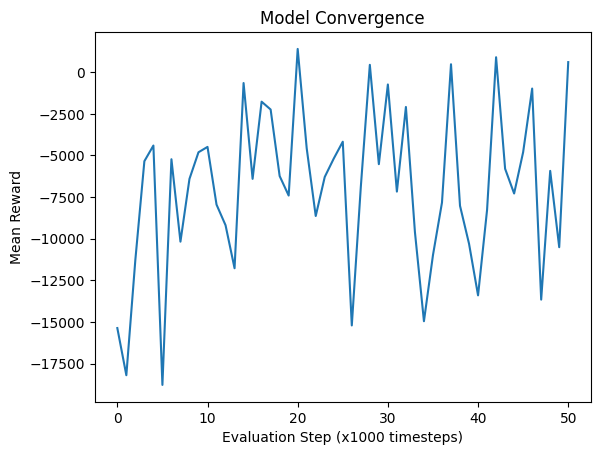

In [41]:
evaluate_model(log_path='./logs/baseline_results')

Average reward of 200 episodes is -6306.


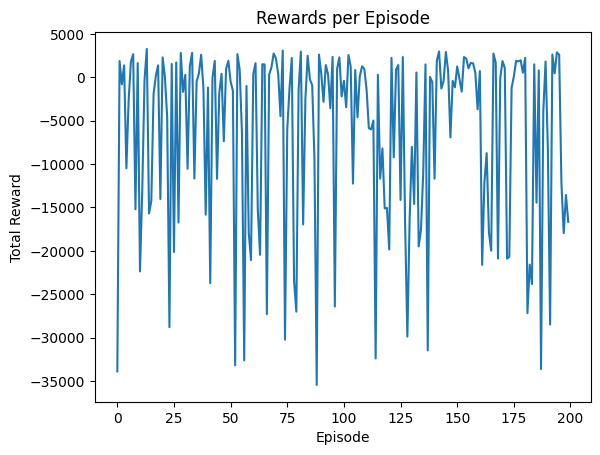

[-33880,
 1869,
 -810,
 1368,
 -10490,
 -2626,
 1811,
 2655,
 -15210,
 1631,
 -22360,
 -13039,
 -324,
 3266,
 -15690,
 -14249,
 -1929,
 172,
 1374,
 -14028,
 2292,
 28,
 -4560,
 -28790,
 1533,
 -20120,
 1707,
 -16740,
 2810,
 -1680,
 275,
 -10539,
 1292,
 2809,
 -11660,
 -490,
 445,
 2595,
 -1259,
 -15830,
 -1189,
 -23710,
 -59,
 1887,
 -11700,
 -1797,
 403,
 -7357,
 953,
 1901,
 -498,
 -1553,
 -33179,
 2672,
 875,
 -6409,
 -32610,
 -1000,
 -17890,
 -21059,
 380,
 1622,
 -15258,
 -20448,
 1500,
 1482,
 -27280,
 326,
 1122,
 2736,
 2194,
 396,
 -4479,
 3076,
 -30220,
 -6010,
 -1248,
 2220,
 -23429,
 -27000,
 -1460,
 2956,
 -16950,
 -2498,
 2475,
 -247,
 -919,
 -9420,
 -35440,
 2613,
 412,
 -2828,
 1404,
 341,
 -3559,
 2347,
 -26409,
 970,
 2292,
 -2198,
 -418,
 -3450,
 2564,
 1244,
 -12250,
 835,
 -4610,
 67,
 1262,
 961,
 -1392,
 -5860,
 -6010,
 -4990,
 -32390,
 281,
 -11679,
 -8200,
 -15109,
 -15050,
 -19840,
 2237,
 -9220,
 871,
 1409,
 -14129,
 2326,
 -16770,
 -29870,
 -16410,
 -802

In [42]:
# Model testing
model_path = './logs/ppo_baseline_model/best_model.zip'
env_test = env_gym.TrafficEnvironment()
num_episodes = 200
test_model(model_path=model_path, env=env, num_episodes=num_episodes)

## Finetune PPO Agent

In [61]:
# Initialize and vectorize the environment
env = env_gym.TrafficEnvironment()
eval_env = Monitor(env_gym.TrafficEnvironment())

# Set up evaluation callback
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path='./logs/ppo_finetune_model',
    log_path='./logs/finetune_results',
    eval_freq=1000,  # Evaluate the model every 1000 steps
    deterministic=True,
    render=False
)

# Define the PPO model with MlpPolicy
model = PPO(
    "MlpPolicy", 
    env, 
    verbose=1,
    learning_rate=2.5e-4,         
    n_steps=4096,               
    batch_size=128,              
    gae_lambda=0.95,            
    gamma=0.99,                 
    clip_range=0.1,
    clip_range_vf=0.1,
    n_epochs=20,
    ent_coef=0.005,
    target_kl=0.01
)

# Train the PPO model
total_timesteps = 100000
model.learn(total_timesteps=total_timesteps, callback=eval_callback)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Eval num_timesteps=1000, episode_reward=-6000.06 +/- 12659.68
Episode length: 667.00 +/- 843.97
---------------------------------
| eval/              |          |
|    mean_ep_length  | 667      |
|    mean_reward     | -6e+03   |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=-7674.52 +/- 9481.85
Episode length: 778.80 +/- 631.66
----------------------------------
| eval/              |           |
|    mean_ep_length  | 779       |
|    mean_reward     | -7.67e+03 |
| time/              |           |
|    total_timesteps | 2000      |
----------------------------------
Eval num_timesteps=3000, episode_reward=-26446.26 +/- 22616.88
Episode length: 2029.80 +/- 1507.76
----------------------------------
| eval/              |           |
|    mean_ep_length  | 2.03e+03  |
|    m

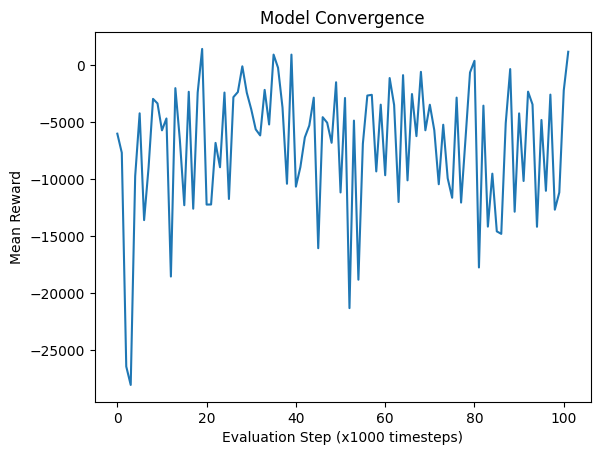

In [62]:
evaluate_model(log_path='./logs/finetune_results')

Average reward of 200 episodes is -6579.


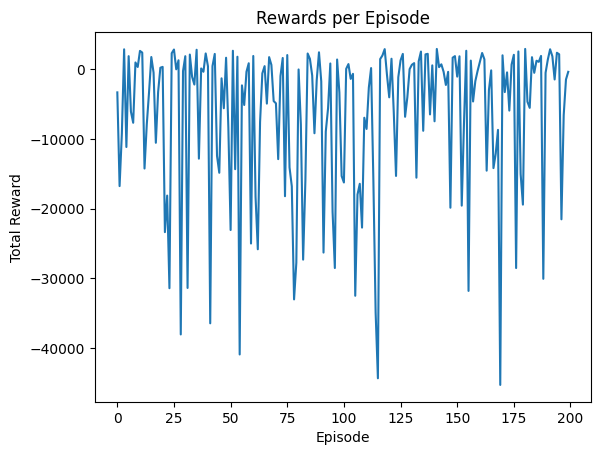

[-3329,
 -16764,
 -9239,
 2843,
 -11160,
 1862,
 -6084,
 -7685,
 960,
 311,
 2617,
 2376,
 -14245,
 -7924,
 -3289,
 1740,
 -509,
 -10555,
 -3290,
 206,
 323,
 -23365,
 -18124,
 -31402,
 2282,
 2815,
 -25,
 1271,
 -38029,
 -279,
 1858,
 -31365,
 2091,
 -1094,
 -2209,
 2780,
 -12830,
 102,
 -375,
 2249,
 413,
 -36434,
 434,
 2183,
 -12433,
 -14855,
 -1315,
 -5605,
 1637,
 -8344,
 -23060,
 2637,
 -14340,
 1779,
 -40900,
 -2324,
 -5135,
 -366,
 843,
 -24995,
 1888,
 -18265,
 -25820,
 -7560,
 -604,
 435,
 -4940,
 1722,
 601,
 -4579,
 -4895,
 -12899,
 -990,
 1602,
 -18214,
 2020,
 -14089,
 -16789,
 -33005,
 -27750,
 -44,
 -7910,
 -27305,
 -15950,
 2244,
 1472,
 -904,
 -9188,
 -1560,
 2416,
 -1750,
 -26293,
 -8939,
 -5624,
 815,
 -20439,
 -28508,
 1383,
 -3348,
 -15318,
 -16249,
 42,
 728,
 -1397,
 -668,
 -32485,
 -17970,
 -16435,
 -22714,
 -6965,
 -8570,
 -2634,
 156,
 -15883,
 -34889,
 -44314,
 1444,
 1961,
 2873,
 -805,
 -4038,
 1493,
 -6147,
 -15309,
 -1154,
 1257,
 2188,
 -6828,
 -4020,


In [64]:
# Model testing
model_path = './logs/ppo_finetune_model/best_model.zip'
env_test = env_gym.TrafficEnvironment()
num_episodes = 200
test_model(model_path=model_path, env=env, num_episodes=num_episodes)